In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/ARAVINDH/Downloads/gas_turbines.csv")

In [4]:
df.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [5]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
X = df.iloc[:,0:3]
y = df.iloc[:,7]

In [9]:
X.dtypes

AT    float64
AP    float64
AH    float64
dtype: object

In [10]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
model = Sequential()
#Adding the input layer and the first hidden layer
model.add(Dense(32, activation='relu', input_dim = 3))

#Adding the second hidden layer
model.add(Dense(32, activation='relu'))

#Adding the third hidden layer
model.add(Dense(32, activation='relu'))

In [15]:
#Adding the output layer
model.add(Dense(1))

In [16]:
#Compiling the ANN
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
1128/1128 [==============================] - 3s 2ms/step - loss: 5995.8575
Epoch 2/100
1128/1128 [==============================] - 2s 2ms/step - loss: 244.5405
Epoch 3/100
1128/1128 [==============================] - 2s 2ms/step - loss: 226.2567
Epoch 4/100
1128/1128 [==============================] - 2s 2ms/step - loss: 219.3057
Epoch 5/100
1128/1128 [==============================] - 2s 2ms/step - loss: 218.1504
Epoch 6/100
1128/1128 [==============================] - 2s 2ms/step - loss: 217.3845
Epoch 7/100
1128/1128 [==============================] - 2s 2ms/step - loss: 216.8979
Epoch 8/100
1128/1128 [==============================] - 2s 2ms/step - loss: 212.8196
Epoch 9/100
1128/1128 [==============================] - 2s 2ms/step - loss: 215.7043
Epoch 10/100
1128/1128 [==============================] - 2s 2ms/step - loss: 213.6235
Epoch 11/100
1128/1128 [==============================] - 2s 2ms/step - loss: 214.7729
Epoch 12/100
1128/1128 [===========================

1128/1128 [==============================] - 2s 2ms/step - loss: 208.3551
Epoch 96/100
1128/1128 [==============================] - 2s 2ms/step - loss: 211.9307
Epoch 97/100
1128/1128 [==============================] - 2s 2ms/step - loss: 209.2998
Epoch 98/100
1128/1128 [==============================] - 2s 2ms/step - loss: 207.8022
Epoch 99/100
1128/1128 [==============================] - 2s 2ms/step - loss: 209.1198
Epoch 100/100
1128/1128 [==============================] - 2s 2ms/step - loss: 210.7849


In [19]:
y_pred = model.predict(X_test)
y_pred

array([[134.09683],
       [139.67401],
       [133.59825],
       ...,
       [128.732  ],
       [143.3064 ],
       [134.73003]], dtype=float32)

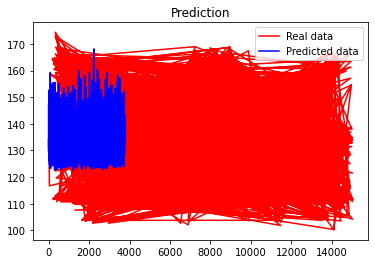

In [18]:
plt.plot(y_test, color='red', label='Real data')
plt.plot(y_pred, color='blue', label='Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()